In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import pathlib
import itertools
import glob
import json

In [2]:
import monalysa
from monalysa import movements
from monalysa import quality

In [3]:
# Define the font family and size
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.weight'] = 'light'  # Use 'light' font weight

In [4]:
base_fig_dir = pathlib.Path.cwd().parent / "figures"

## Generate random movements for LDLJ and SPARC

In [125]:
Ts0, Ts1 = 0.0, 3.0
dTs = 0.05
Ts = np.arange(Ts0, Ts1 + dTs, dTs)
Ns = np.arange(1, 51, 1)
tsamp = 0.01
# Generate all moveemnts
movedata = [
    [movements.gaussian_rhytmic_movement(amp=1, dur=1., interval=_ts,
                                         ts=tsamp, n_movements=_ns)[1]
     for _ns in Ns]
    for _ts in Ts
]

In [126]:
# Compute smoothness
# SPARC
sparc_smooth = np.array([
    [quality.smoothness.sparc(_move, fs=1 / tsamp)[0]
     for _move in _moves]
    for _moves in movedata
])
# SPARC
ldlj_smooth = np.array([
    [quality.smoothness.log_dimensionless_jerk(_move, fs=1 / tsamp, data_type="vel")
     for _move in _moves]
    for _moves in movedata
])

(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(105, 1)
(110, 1)
(115, 1)
(120, 1)
(125, 1)
(130, 1)
(135, 1)
(140, 1)
(145, 1)
(150, 1)
(155, 1)
(160, 1)
(165, 1)
(171, 1)
(175, 1)
(180, 1)
(185, 1)
(190, 1)
(195, 1)
(200, 1)
(205, 1)
(210, 1)
(216, 1)
(220, 1)
(225, 1)
(230, 1)
(235, 1)
(241, 1)
(245, 1)
(250, 1)
(255, 1)
(260, 1)
(266, 1)
(270, 1)
(275, 1)
(280, 1)
(285, 1)
(291, 1)
(295, 1)
(300, 1)
(305, 1)
(310, 1)
(315, 1)
(320, 1)
(325, 1)
(330, 1)
(335, 1)
(341, 1)
(345, 1)
(100, 1)
(110, 1)
(120, 1)
(130, 1)
(140, 1)
(150, 1)
(160, 1)
(171, 1)
(180, 1)
(190, 1)
(200, 1)
(

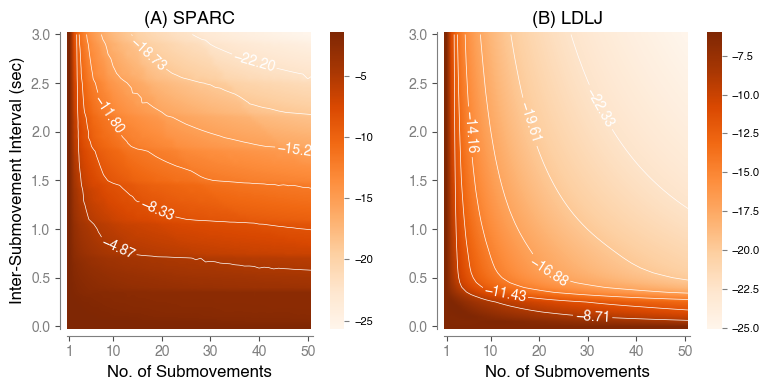

In [132]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
_data = sparc_smooth[::-1, :]
_hm = ax.imshow(_data, cmap='Oranges', interpolation='bilinear')
levels = np.linspace(np.min(_data), np.max(_data), 8)
contours = ax.contour(Ns, np.arange(len(Ts)), _data, colors='white',
                      extend='both', levels=levels, linewidths=0.5,
                      linestyles='solid')
ax.clabel(contours, inline=True, fontsize=10)
_cbar = plt.colorbar(_hm)
# Modify colorbar settings
_cbar.ax.tick_params(labelsize=8)
_cbar.set_alpha(0.7)
_cbar.outline.set_linewidth(0.)
_cbar.ax.yaxis.set_tick_params(color='tab:gray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("No. of Submovements", fontsize=12)
ax.set_ylabel("Inter-Submovement Interval (sec)", fontsize=12)
ax.set_xticks([0, 9, 19, 29, 39, 49],
              labels=[1, 10, 20, 30, 40, 50], color="tab:gray")
ax.set_yticks(np.arange(_data.shape[0])[::10],
              labels=3 - Ts[::10], color="tab:gray")
ax.set_yticks(np.arange(_data.shape[0])[::10],
              labels=3 - Ts[::10], color="tab:gray")
ax.set_title("(A) SPARC", fontsize=13)

ax = fig.add_subplot(122)
_data = ldlj_smooth[::-1, :]
_hm = ax.imshow(_data, cmap='Oranges', interpolation='bilinear')
        #   vmin=-20, vmax=-1)
levels = np.linspace(np.min(_data), np.max(_data), 8)
contours = ax.contour(Ns, np.arange(len(Ts)), _data, colors='white',
                      extend='both', levels=levels, linewidths=0.5,
                      linestyles='solid')
ax.clabel(contours, inline=True, fontsize=10)
_cbar = plt.colorbar(_hm)
_cbar.ax.tick_params(labelsize=8)
_cbar.set_alpha(0.7)
_cbar.outline.set_linewidth(0.)
_cbar.ax.yaxis.set_tick_params(color='tab:gray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xticks([0, 9, 19, 29, 39, 49],
              labels=[1, 10, 20, 30, 40, 50], color="tab:gray")
ax.set_yticks(np.arange(_data.shape[0])[::10],
              labels=3 - Ts[::10], color="tab:gray")
ax.set_xlabel("No. of Submovements", fontsize=12)
ax.set_title("(B) LDLJ", fontsize=13)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0)
plt.tight_layout()

# Save the figure
fig.savefig(pathlib.Path(base_fig_dir, f"smm_struct.pdf"), bbox_inches="tight")
fig.savefig(pathlib.Path(base_fig_dir, f"smm_struct.svg"), bbox_inches="tight")